In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn import preprocessing

from datafold import (
    EDMD,
    DMDStandard,
    GaussianKernel,
    TSCPolynomialFeatures,
    TSCRadialBasis,
    TSCDataFrame
)
from datafold.utils._systems import Hopf
from datafold.utils.general import generate_2d_regular_mesh

In [55]:
df = pd.read_csv("result_df.csv")
#df = pd.read_csv("result_df.csv", index_col=[0, 1, 2], header=[0])

#tscdf = TSCDataFrame.from_csv("result_df.csv")
#tscdf
df.head()
data = df[df.id==0]
#data = df.drop("run_id", axis = 'columns')
data.to_csv('out.csv', sep='\t')
data.head()

,id,run_id,timeStep,faceId,meshDensityCounting-PID4
0,0,0,1,1,0
1,0,0,1,2,23
2,0,0,1,3,0
3,0,0,1,4,20
4,0,0,1,5,28


In [56]:
data2 = data.drop(['id',"run_id"], axis = 'columns')
data2.head()

,timeStep,faceId,meshDensityCounting-PID4
0,1,1,0
1,1,2,23
2,1,3,0
3,1,4,20
4,1,5,28


In [4]:
row= data2.shape[0]
series1=[]
for i in range(0,row):
    if data2['faceId'].iloc[i]==1:
        series1.append(data2['meshDensityCounting-PID4'].iloc[i])
series2=[]
for i in range(0,row):
    if data2['faceId'].iloc[i]==2:
        series2.append(data2['meshDensityCounting-PID4'].iloc[i])
#series1

In [5]:
len(series2)

1251

In [6]:
ser1=pd.DataFrame(series1, columns=['meshDensityCounting-PID4'])
ser2=pd.DataFrame(series1, columns=['meshDensityCounting-PID4'])
ser3 = pd.DataFrame({'face1': series1,
                     'face2' : series2})

In [9]:
data2['faceId'].max()

80

In [57]:
row= data2.shape[0]
num_timesteps = data2['timeStep'].max()
num_faces = data2['faceId'].max()

empty_data={}
df_final = pd.DataFrame(empty_data)
for i in range(0,num_faces):
    #series[i]=[]
    temp_series=[[]]
    temp_var = 'face' + str(i+1)
    for j in range(0,row):
        if data2['faceId'].iloc[j]==i+1:
            temp_series[0].append(data2['meshDensityCounting-PID4'].iloc[j])
    df_final[temp_var] = temp_series[0]

#seriesx[0]

df_final
        


,face1,face2,face3,face4,face5,face6,face7,face8,face9,face10,...,face71,face72,face73,face74,face75,face76,face77,face78,face79,face80
0,0,23,0,20,28,30,0,22,22,8,...,0,0,0,0,0,0,0,0,0,0
1,0,27,0,21,29,24,0,19,31,14,...,0,0,0,0,0,0,0,0,0,0
2,2,26,0,21,29,30,0,23,25,16,...,0,0,0,0,0,0,0,0,0,0
3,3,25,0,23,27,27,0,22,26,18,...,0,0,0,0,0,0,0,0,0,0
4,6,29,0,20,28,25,0,24,26,18,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df_final= pd.DataFrame(df_final)

In [58]:
df_final.to_csv('test.csv')

In [215]:
df_final.isnull().to_csv('check.csv')

In [59]:
df_final.max()

face1     35
face2     29
face3     30
face4     24
face5     31
          ..
face76    82
face77    67
face78    36
face79     3
face80    21
Length: 80, dtype: int64

In [276]:
x=df_final.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_final2 = pd.DataFrame(x_scaled)

df_final2.columns = ['face' + str(col+1) for col in df_final2.columns]
df_final2.head()

,face1,face2,face3,face4,face5,face6,face7,face8,face9,face10,...,face71,face72,face73,face74,face75,face76,face77,face78,face79,face80
0,0.000000,0.793103,0.0,0.833333,0.903226,0.967742,0.0,0.814815,0.709677,0.275862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.931034,0.0,0.875000,0.935484,0.774194,0.0,0.703704,1.000000,0.482759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.057143,0.896552,0.0,0.875000,0.935484,0.967742,0.0,0.851852,0.806452,0.551724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.085714,0.862069,0.0,0.958333,0.870968,0.870968,0.0,0.814815,0.838710,0.620690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.171429,1.000000,0.0,0.833333,0.903226,0.806452,0.0,0.888889,0.838710,0.620690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
tsc_regular1 = TSCDataFrame.from_frame_list([df_final]).astype(np.float64) 
tsc_regular1

feature  face1  face2  face3  face4  face5  face6  face7  face8  face9  \
ID time                                                                  
0  0       0.0   23.0    0.0   20.0   28.0   30.0    0.0   22.0   22.0   
   1       0.0   27.0    0.0   21.0   29.0   24.0    0.0   19.0   31.0   
   2       2.0   26.0    0.0   21.0   29.0   30.0    0.0   23.0   25.0   
   3       3.0   25.0    0.0   23.0   27.0   27.0    0.0   22.0   26.0   
   4       6.0   29.0    0.0   20.0   28.0   25.0    0.0   24.0   26.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...   
   1246    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1247    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1248    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1249    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1250    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

feature  face10  ...  face71  face72  face73  face74  face75  face76  face77  \
ID time          ...                                                           
0  0        8.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   1       14.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   2       16.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   3       18.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   4       18.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...  ...     ...     ...     ...     ...     ...     ...     ...   
   1246     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   1247     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   1248     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   1249     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
   1250     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

feature  face78  face79  face80  
ID time                          
0  0        0.0     0.0     0.0  
   1        0.0     0.0     0.0  
   2        0.0     0.0     0.0  
   3        0.0     0.0     0.0  
   4        0.0     0.0     0.0  
...         ...     ...     ...  
   1246     0.0     0.0     0.0  
   1247     0.0     0.0     0.0  
   1248     0.0     0.0     0.0  
   1249     0.0     0.0     0.0  
   1250     0.0     0.0     0.0  

[1251 rows x 80 columns]

In [70]:
#tsc_regular1.plot(figsize=(7, 7))

In [72]:
X_tsc=tsc_regular1
X_tsc.to_csv('input2.csv', sep='\t')

In [77]:
time_values= X_tsc.time_values()
time_values

array([   0,    1,    2, ..., 1248, 1249, 1250])

In [73]:
X_tsc.initial_states()


/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(


,feature,face1,face2,face3,face4,face5,face6,face7,face8,face9,face10,...,face71,face72,face73,face74,face75,face76,face77,face78,face79,face80
ID,time,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,23.0,0.0,20.0,28.0,30.0,0.0,22.0,22.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
idx_arrow = np.array([time_values.shape[0] // 2 - 1, time_values.shape[0] // 2])

def include_arrow(ax, df):
    arrow = df.iloc[idx_arrow, :]
    ax.arrow(
        arrow.iloc[0, 0],
        arrow.iloc[0, 1],
        dx=arrow.iloc[1, 0] - arrow.iloc[0, 0],
        dy=arrow.iloc[1, 1] - arrow.iloc[0, 1],
        color="black",
        head_width=0.05,
    )

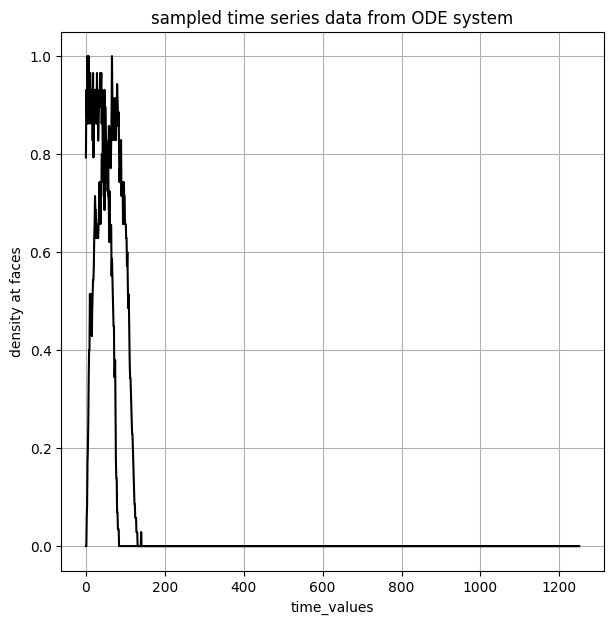

In [283]:
fig, ax = plt.subplots(figsize=[7, 7])

for _id, df in X_tsc.itertimeseries():
    ax.plot(time_values,df["face1"].to_numpy(), 0.1, c="black")
    ax.plot(time_values,df["face2"].to_numpy(), 0.1, c="black")
    #include_arrow(ax, df)

ax.set_title("sampled time series data from ODE system")
ax.set_xlabel("time_values")
ax.set_ylabel("density at faces")
#ax.axis("equal")
ax.grid();

In [324]:
dmd = DMDStandard(rank=70).fit(X=X_tsc, store_system_matrix=True)

# Check available attributes
attributes = [attr for attr in dir(dmd) if not callable(getattr(dmd, attr)) and not attr.startswith("__")]
print("Available Attributes:")
print(attributes)

# Print values of some common attributes
if 'dmd_modes' in attributes:
    print("DMD Modes:")
    print(dmd.dmd_modes)

if 'eigenvalues_' in attributes:
    print("Eigenvalues:")
    print(dmd.eigenvalues_)

if 'dt_' in attributes:
    print("Dt:")
    print(dmd.dt_)

Available Attributes:
['_abc_impl', '_cls_feature_attrs', '_cls_valid_sys_mode', '_cls_valid_sys_type', '_valid_reconstruct_modes', 'approx_generator', 'compute_pseudospectrum', 'control_matrix_', 'diagonalize', 'dmd_modes', 'dt_', 'eigenvalues_', 'eigenvectors_left_', 'eigenvectors_right_', 'feature_names_in_', 'is_control_affine', 'is_controlled', 'is_differential_system', 'is_flowmap_system', 'is_matrix_mode', 'is_spectral_mode', 'is_time_invariant', 'n_features_in_', 'rank', 'rcond', 'reconstruct_mode', 'residual_filter', 'sys_mode', 'sys_type', 'system_matrix_']
DMD Modes:
[[-0.0002966 -0.00038083j -0.0002966 +0.00038083j  0.00059789+0.j
  ... -0.07523637-0.06261602j -0.06120735+0.j
   0.0335323 +0.j        ]
 [ 0.00020165-0.00036277j  0.00020165+0.00036277j  0.00015803+0.j
  ...  0.11341693-0.04149155j  0.06116284+0.j
  -0.07020477+0.j        ]
 [-0.00102233-0.00330893j -0.00102233+0.00330893j  0.00329528+0.j
  ... -0.03150974-0.05598852j -0.14661495+0.j
   0.1118575 +0.j        

In [78]:
dmd = DMDStandard()
dmd.fit(X_tsc#, store_system_matrix=True
)  # X must be of type TSCDataFrame
#dmd
dmd_values = dmd.predict(X_tsc.initial_states(), time_values=time_values)

#dmd_values_oos = dmd.predict(np.array([-1.8, 2]), time_values=np.linspace(0, 100, 1250))
X_predicted = dmd.reconstruct(X_tsc)

print(
    "Data snipped for predicted time series training data and out-of-sample prediction"
)
X_predicted
#dmd_values.to_csv('out2.csv', sep='\t')
#dmd_values

/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1883: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  for (_, _, _), df in time_series_table.groupby(
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and

Data snipped for predicted time series training data and out-of-sample prediction


feature         face1      face2         face3      face4      face5  \
ID time                                                                
0  0     4.975020e-12  23.000000 -2.640114e-12  20.000000  28.000000   
   1     1.141957e+00  27.204948  1.538103e-01  20.602961  28.929645   
   2     2.435564e+00  26.101381  1.582048e-01  21.408941  29.101797   
   3     3.041692e+00  25.237673 -4.256719e-02  22.102885  28.031215   
   4     4.894506e+00  28.739566  3.407145e-02  20.995993  27.428216   
...               ...        ...           ...        ...        ...   
   1246 -9.876225e-05  -0.000021 -3.362487e-04   0.000014   0.000018   
   1247 -9.784900e-05  -0.000021 -3.331671e-04   0.000014   0.000018   
   1248 -9.693865e-05  -0.000021 -3.300952e-04   0.000014   0.000018   
   1249 -9.603127e-05  -0.000020 -3.270332e-04   0.000014   0.000018   
   1250 -9.512691e-05  -0.000020 -3.239812e-04   0.000014   0.000018   

feature      face6         face7      face8         face9     face10  ...  \
ID time                                                               ...   
0  0     30.000000 -5.056483e-12  22.000000  2.200000e+01   8.000000  ...   
   1     24.248164  2.899109e-02  19.900456  3.010745e+01  14.040639  ...   
   2     29.533949 -1.047610e+00  22.806342  2.530302e+01  16.384239  ...   
   3     27.064348 -2.619433e-02  22.174983  2.618651e+01  17.744564  ...   
   4     24.829800  3.154961e-01  22.788903  2.673731e+01  17.688065  ...   
...            ...           ...        ...           ...        ...  ...   
   1246   0.000002  3.885784e-03  -0.000009 -3.881851e-07   0.000003  ...   
   1247   0.000002  3.815617e-03  -0.000009 -2.903982e-07   0.000003  ...   
   1248   0.000002  3.746125e-03  -0.000009 -1.941336e-07   0.000003  ...   
   1249   0.000003  3.677304e-03  -0.000008 -9.937826e-08   0.000003  ...   
   1250   0.000003  3.609151e-03  -0.000008 -6.119336e-09   0.000003  ...   

feature        face71        face72        face73        face74        face75  \
ID time                                                                         
0  0     3.369527e-14 -1.775663e-14 -2.628977e-12  7.346485e-13  1.031068e-11   
   1    -5.027626e-02 -1.497022e-01  1.895585e-01  6.521565e-02 -1.871005e-01   
   2     2.244610e-01 -4.868216e-02 -1.007314e-01 -4.203913e-01  5.181203e-01   
   3    -1.980015e-01  2.960372e-01 -9.620394e-02  3.748186e-01 -3.574988e-01   
   4    -3.548120e-02  1.422844e-01 -8.188146e-03  9.745528e-02 -2.038519e-01   
...               ...           ...           ...           ...           ...   
   1246  1.738756e-03  1.028690e-02  2.508092e-02  2.646028e-02  1.981695e-02   
   1247  1.707903e-03  1.018541e-02  2.507079e-02  2.652823e-02  2.020530e-02   
   1248  1.677343e-03  1.008436e-02  2.505794e-02  2.659209e-02  2.058526e-02   
   1249  1.647076e-03  9.983736e-03  2.504243e-02  2.665189e-02  2.095692e-02   
   1250  1.617098e-03  9.883552e-03  2.502428e-02  2.670771e-02  2.132036e-02   

feature        face76        face77        face78        face79        face80  
ID time                                                                        
0  0     6.573214e-13  2.335536e-12  2.889883e-12 -1.597421e-12 -2.737810e-12  
   1     2.406679e-01  1.252475e-01 -1.346049e-01 -4.569392e-03  4.293817e-02  
   2    -2.420118e-01  2.992198e-02 -1.212331e-01 -5.747480e-03 -5.949289e-03  
   3     7.892947e-02 -8.643314e-02  5.080667e-02 -1.370774e-02 -2.224805e-01  
   4     1.713995e-01 -7.006444e-02 -4.744396e-03 -3.396965e-03  1.531160e-01  
...               ...           ...           ...           ...           ...  
   1246  2.915049e-02  2.755500e-02  1.113869e-02  5.748800e-04  1.125737e-03  
   1247  2.922014e-02  2.754651e-02  1.102109e-02  5.660327e-04  1.105143e-03  
   1248  2.928536e-02  2.753499e-02  1.090408e-02  5.572601e-04  1.084750e-03  
   1249  2.934620e-02  2.752050e-02  1.078766e-02  5.485621e-04  1.064555e-03  
   1250  2.940272e-02  2.750308e-02  1.067184e-

In [75]:
dmd_values_oos = dmd.predict(X_tsc.initial_states(), time_values=np.linspace(0, 100, 1251))

/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1666: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).tail(


In [243]:
#dmd_values_oos

In [287]:
dmd_values_oos.to_csv('oos_out1.csv', sep='\t')

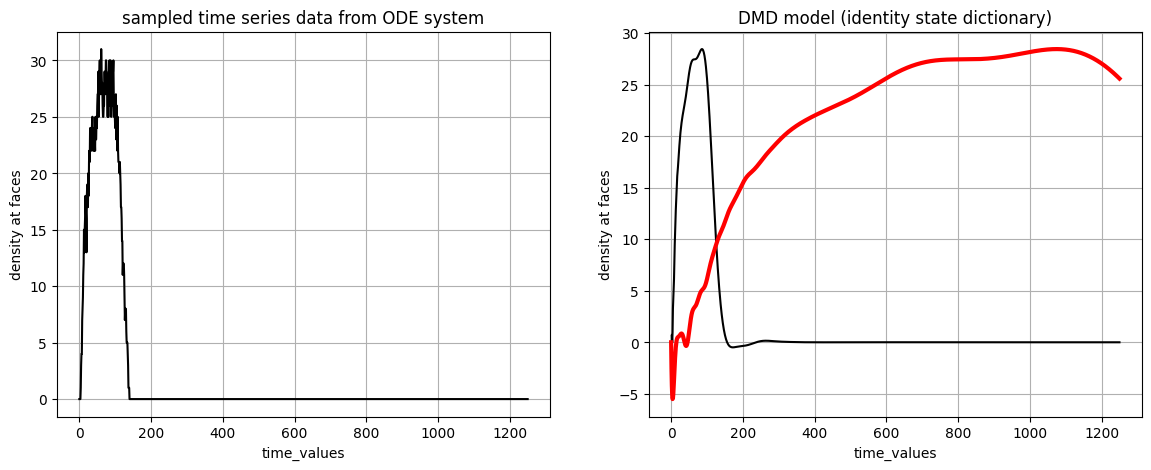

In [80]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
for _id, df in X_tsc.itertimeseries():
    ax[0].plot(time_values,df['face15'].to_numpy(), 0.1, c="black")
    #ax[0].plot(time_values,df["face2"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[0], df)

ax[0].set_title("sampled time series data from ODE system")
ax[0].set_xlabel("time_values")
ax[0].set_ylabel("density at faces")
#ax[0].axis("equal")
ax[0].grid();

for _id, df in dmd_values.itertimeseries():
    ax[1].plot(time_values,df['face15'].to_numpy(), 0.1, c="black")
    #ax[1].plot(time_values,df["face2"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[1], df)

ax[1].set_title("DMD model (identity state dictionary)")
ax[1].set_xlabel("time_values")
ax[1].set_ylabel("density at faces")
#ax[1].axis("equal")
ax[1].grid()


# generate red "out-of-sample" prediction, for extra analysis below

ax[1].plot(
    time_values,
    dmd_values_oos['face15'].to_numpy(),
    0.1,
    c="red",
    linewidth=3,
)
#include_arrow(ax[1], dmd_values_oos)


In [326]:
generator_A = (dmd.system_matrix_ - np.eye(70)) / dmd.dt_
#generator_A
det = np.linalg.det(generator_A)
trace = np.trace(generator_A)

print("Relevant values for the stability analysis: \n")
print(f"determinant of A: {det}")
print(f"trace of A: {trace}")

print(f"Delta {1/4. * trace ** 2} ")
#class GDMD

Relevant values for the stability analysis: 

determinant of A: 1.2216194200632746e-28
trace of A: -41.40720935049661
Delta 428.6392465489634 


In [81]:
dict_step = [
    (
        "polynomial",
        TSCPolynomialFeatures(degree=2),
    )
]
 #set rank in edmd

edmd_poly = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=X_tsc)
edmd_poly_values = edmd_poly.predict(
    X_tsc.initial_states(), time_values=X_tsc.time_values()
)

/home/uppili11/.local/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: There are more observables than snapshots. The current implementation favors more snapshots than observables. This may result in a bad computational performance.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/.local/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: Shift matrix (G.shape=(3320, 3320)) has not full rank (linregress_model.rank_=417), falling back to least squares solution.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:16

In [82]:
# access models in the dictionary, the name was given in "dict_step" above
print(edmd_poly.named_steps["polynomial"])

print("")
print("polynomial degrees for data (first column 'x1' and second 'x2'):")
print(edmd_poly.named_steps["polynomial"].powers_)

print("")
print("Dictionary space values:")
edmd_poly.transform(X_tsc)

TSCPolynomialFeatures()

polynomial degrees for data (first column 'x1' and second 'x2'):
[[2 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 2]]

Dictionary space values:


feature  face1  face2  face3  face4  face5  face6  face7  face8  face9  \
ID time                                                                  
0  0       0.0   23.0    0.0   20.0   28.0   30.0    0.0   22.0   22.0   
   1       0.0   27.0    0.0   21.0   29.0   24.0    0.0   19.0   31.0   
   2       2.0   26.0    0.0   21.0   29.0   30.0    0.0   23.0   25.0   
   3       3.0   25.0    0.0   23.0   27.0   27.0    0.0   22.0   26.0   
   4       6.0   29.0    0.0   20.0   28.0   25.0    0.0   24.0   26.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...   
   1246    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1247    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1248    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1249    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1250    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

feature  face10  ...  face77^2  face77 face78  face77 face79  face77 face80  \
ID time          ...                                                          
0  0        8.0  ...       0.0            0.0            0.0            0.0   
   1       14.0  ...       0.0            0.0            0.0            0.0   
   2       16.0  ...       0.0            0.0            0.0            0.0   
   3       18.0  ...       0.0            0.0            0.0            0.0   
   4       18.0  ...       0.0            0.0            0.0            0.0   
...         ...  ...       ...            ...            ...            ...   
   1246     0.0  ...       0.0            0.0            0.0            0.0   
   1247     0.0  ...       0.0            0.0            0.0            0.0   
   1248     0.0  ...       0.0            0.0            0.0            0.0   
   1249     0.0  ...       0.0            0.0            0.0            0.0   
   1250     0.0  ...       0.0            0.0            0.0            0.0   

feature  face78^2  face78 face79  face78 face80  face79^2  face79 face80  \
ID time                                                                    
0  0          0.0            0.0            0.0       0.0            0.0   
   1          0.0            0.0            0.0       0.0            0.0   
   2          0.0            0.0            0.0       0.0            0.0   
   3          0.0            0.0            0.0       0.0            0.0   
   4          0.0            0.0            0.0       0.0            0.0   
...           ...            ...            ...       ...            ...   
   1246       0.0            0.0            0.0       0.0            0.0   
   1247       0.0            0.0            0.0       0.0            0.0   
   1248       0.0            0.0            0.0       0.0            0.0   
   1249       0.0            0.0            0.0       0.0            0.0   
   1250       0.0            0.0            0.0       0.0            0.0   

feature  face80^2  
ID time            
0  0          0.0  
   1          0.0  
   2          0.0  
   3          0.0  
   4          0.0  
...           ...  
   1246       0.0  
   1247       0.0  
   1248       0.0  
   1249       0.0  
   1250       0.0  

[1251 rows x 3320 columns]

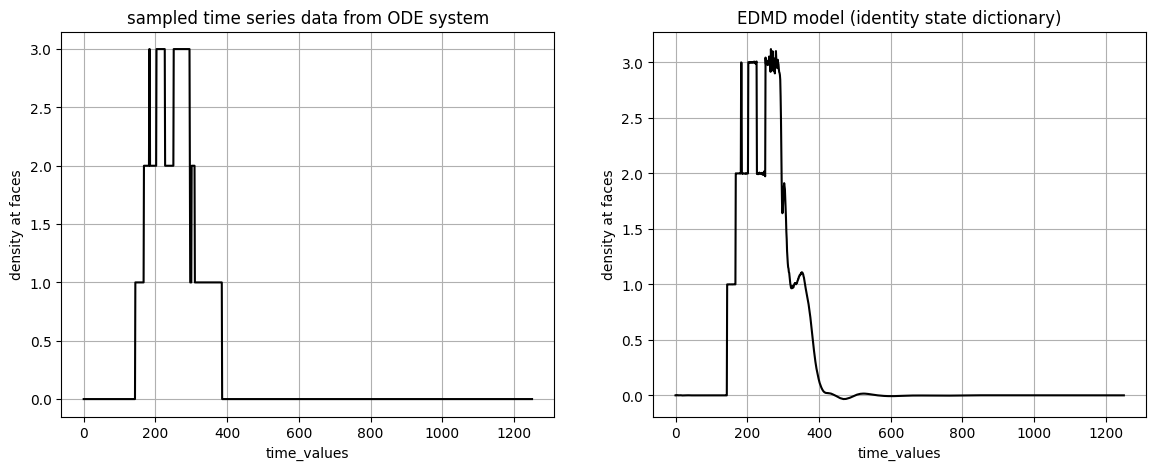

In [83]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
for _id, df in X_tsc.itertimeseries():
    ax[0].plot(time_values,df['face79'].to_numpy(), 0.1, c="black")
    #ax[0].plot(time_values,df["face2"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[0], df)

ax[0].set_title("sampled time series data from ODE system")
ax[0].set_xlabel("time_values")
ax[0].set_ylabel("density at faces")
#ax[0].axis("equal")
ax[0].grid();

for _id, df in edmd_poly_values.itertimeseries():
    ax[1].plot(time_values,df['face79'].to_numpy(), 0.1, c="black")
    #ax[1].plot(time_values,df["face2"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[1], df)

ax[1].set_title("EDMD model (identity state dictionary)")
ax[1].set_xlabel("time_values")
ax[1].set_ylabel("density at faces")
#ax[1].axis("equal")
ax[1].grid()

In [84]:
dict_step2 = [
    (
        "rbf",
        TSCRadialBasis(
            kernel=GaussianKernel(epsilon=0.17)#, center_type="initial_condition" #change center_type
        ),
    )
]

# Note that the "extended" part is in the transformations
edmd_rbf = EDMD(dict_steps=dict_step2, include_id_state=True).fit(X=X_tsc)
edmd_rbf_values = edmd_rbf.predict(
    X_tsc.initial_states(), time_values=X_tsc.time_values()
)

len_koopman_matrix = len(edmd_rbf.named_steps["dmd"].eigenvectors_right_)
print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
edmd_rbf.transform(X_tsc)

/home/uppili11/.local/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: There are more observables than snapshots. The current implementation favors more snapshots than observables. This may result in a bad computational performance.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/.local/lib/python3.10/site-packages/datafold/dynfold/dmd.py:1265: UserWarning: Shift matrix (G.shape=(1331, 1331)) has not full rank (linregress_model.rank_=614), falling back to least squares solution.
  ) = self._compute_full_system_matrix(X, sample_weights=sample_weights)
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:1636: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return self.groupby(by=TSCDataFrame.tsc_id_idx_name, axis=0, level=0).head(
/home/uppili11/.local/lib/python3.10/site-packages/datafold/pcfold/timeseries/collection.py:16

shape of Koopman matrix: 1331 x 1331


feature  face1  face2  face3  face4  face5  face6  face7  face8  face9  \
ID time                                                                  
0  0       0.0   23.0    0.0   20.0   28.0   30.0    0.0   22.0   22.0   
   1       0.0   27.0    0.0   21.0   29.0   24.0    0.0   19.0   31.0   
   2       2.0   26.0    0.0   21.0   29.0   30.0    0.0   23.0   25.0   
   3       3.0   25.0    0.0   23.0   27.0   27.0    0.0   22.0   26.0   
   4       6.0   29.0    0.0   20.0   28.0   25.0    0.0   24.0   26.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...   
   1246    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1247    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1248    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1249    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
   1250    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

feature  face10  ...  rbf1241  rbf1242  rbf1243  rbf1244  rbf1245  rbf1246  \
ID time          ...                                                         
0  0        8.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
   1       14.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
   2       16.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
   3       18.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
   4       18.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
...         ...  ...      ...      ...      ...      ...      ...      ...   
   1246     0.0  ...      1.0      1.0      1.0      1.0      1.0      1.0   
   1247     0.0  ...      1.0      1.0      1.0      1.0      1.0      1.0   
   1248     0.0  ...      1.0      1.0      1.0      1.0      1.0      1.0   
   1249     0.0  ...      1.0      1.0      1.0      1.0      1.0      1.0   
   1250     0.0  ...      1.0      1.0      1.0      1.0      1.0      1.0   

feature  rbf1247  rbf1248  rbf1249  rbf1250  
ID time                                      
0  0         0.0      0.0      0.0      0.0  
   1         0.0      0.0      0.0      0.0  
   2         0.0      0.0      0.0      0.0  
   3         0.0      0.0      0.0      0.0  
   4         0.0      0.0      0.0      0.0  
...          ...      ...      ...      ...  
   1246      1.0      1.0      1.0      1.0  
   1247      1.0      1.0      1.0      1.0  
   1248      1.0      1.0      1.0      1.0  
   1249      1.0      1.0      1.0      1.0  
   1250      1.0      1.0      1.0      1.0  

[1251 rows x 1331 columns]

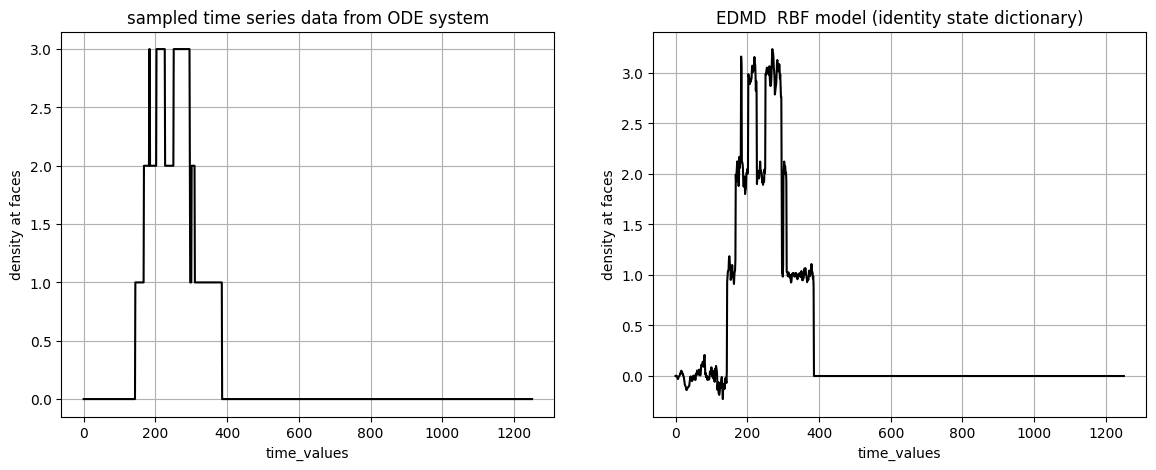

In [85]:
f, ax = plt.subplots(1, 2, figsize=(14, 5))
for _id, df in X_tsc.itertimeseries():
    ax[0].plot(time_values,df['face79'].to_numpy(), 0.1, c="black")
    #ax[0].plot(time_values,df["face2"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[0], df)

ax[0].set_title("sampled time series data from ODE system")
ax[0].set_xlabel("time_values")
ax[0].set_ylabel("density at faces")
#ax[0].axis("equal")
ax[0].grid();

for _id, df in edmd_rbf_values.itertimeseries():
    ax[1].plot(time_values,df['face79'].to_numpy(), 0.1, c="black")
    #ax[1].plot(time_values,df["face2"].to_numpy(), 0.1, c="black")
    #include_arrow(ax[1], df)

ax[1].set_title("EDMD  RBF model (identity state dictionary)")
ax[1].set_xlabel("time_values")
ax[1].set_ylabel("density at faces")
#ax[1].axis("equal")
ax[1].grid()

In [ ]:
#difference of dmd and train data and norm it - TSC metrics
#create y (target)
#run multiple seeds
#separate into training and testing data, try reconstruction
# to avoid NaN values in dmd, make sure to add np.float at the end of creation of TSCDataFrame
